# Abalone Case Study

#### About the data set
Data comes from an original (non-machine-learning) study : The Population Biology of Abalone (Haliotis species) in Tasmania. From the original data examples with missing values were removed, and the ranges of the continuous values have been scaled by dividing with 200.

#### Variable discription
Sex: M (male), F (female), I (infant)

Length: longest shell measurement (in mm)

Diameter: measurement perpendicular to legnth (in mm)

Height: with meat in shell (in mm)

Whole weight: the whole abalone (in grams)

Shucked weight: weight of the meat (in grams)

Viscera weight: gut weight after bleeding (in grams)

Shell weight: after being dried (in grams)

Rings: + 1.5 gives the age in years (the value to predict)


In [1]:
# importing necessary libraries and as it's classification problem we'll select some clissifier  technique
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
# models
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingClassifier,GradientBoostingClassifier
from sklearn.model_selection import train_test_split 
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,auc,classification_report,confusion_matrix,f1_score,roc_auc_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
# loading dataset
df=pd.read_csv(r"C:\Users\hp\Dropbox\PC\Desktop\Data trained\abalone\abalone.csv")
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [3]:
df.shape

(4177, 9)

In [4]:
# checking stats
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [5]:
# we see there is no null values 
# describe dont show object data type but isnull help us in that
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [6]:
df['Sex'].unique()

array(['M', 'F', 'I'], dtype=object)

In [7]:
# as we can we saw we did'nt get info of sex since its categorical data in .describe method
# but isnull showed us that result about sex
# 1(a)label encoder=basic encoding technique(if 100 character it i'll make 100 column)
from sklearn.preprocessing import LabelEncoder
lab_en=LabelEncoder()

In [8]:
df2=lab_en.fit_transform(df['Sex'])
pd.Series(df2)
df['Sex']=df2

In [9]:
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


### sex column has been encoded M=2, F=0, I=1

In [10]:
#  checking unique values
df['Sex'].unique()

array([2, 0, 1])

In [11]:
df['Sex'].value_counts()

2    1528
1    1342
0    1307
Name: Sex, dtype: int64

In [12]:
#Adding Target Column Age= Rings+1.5

df['Age'] = df.Rings + 1.5
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,16.5
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,8.5
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,10.5
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,11.5
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,8.5
...,...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,12.5
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,11.5
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,10.5
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,11.5


In [13]:
df.describe()


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,1.052909,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684,11.433684
std,0.822240,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169,3.224169
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000,2.500000
25%,0.000000,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000,9.500000
50%,1.000000,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000,10.500000
75%,2.000000,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000,12.500000
max,2.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000,30.500000


## Data Visualization

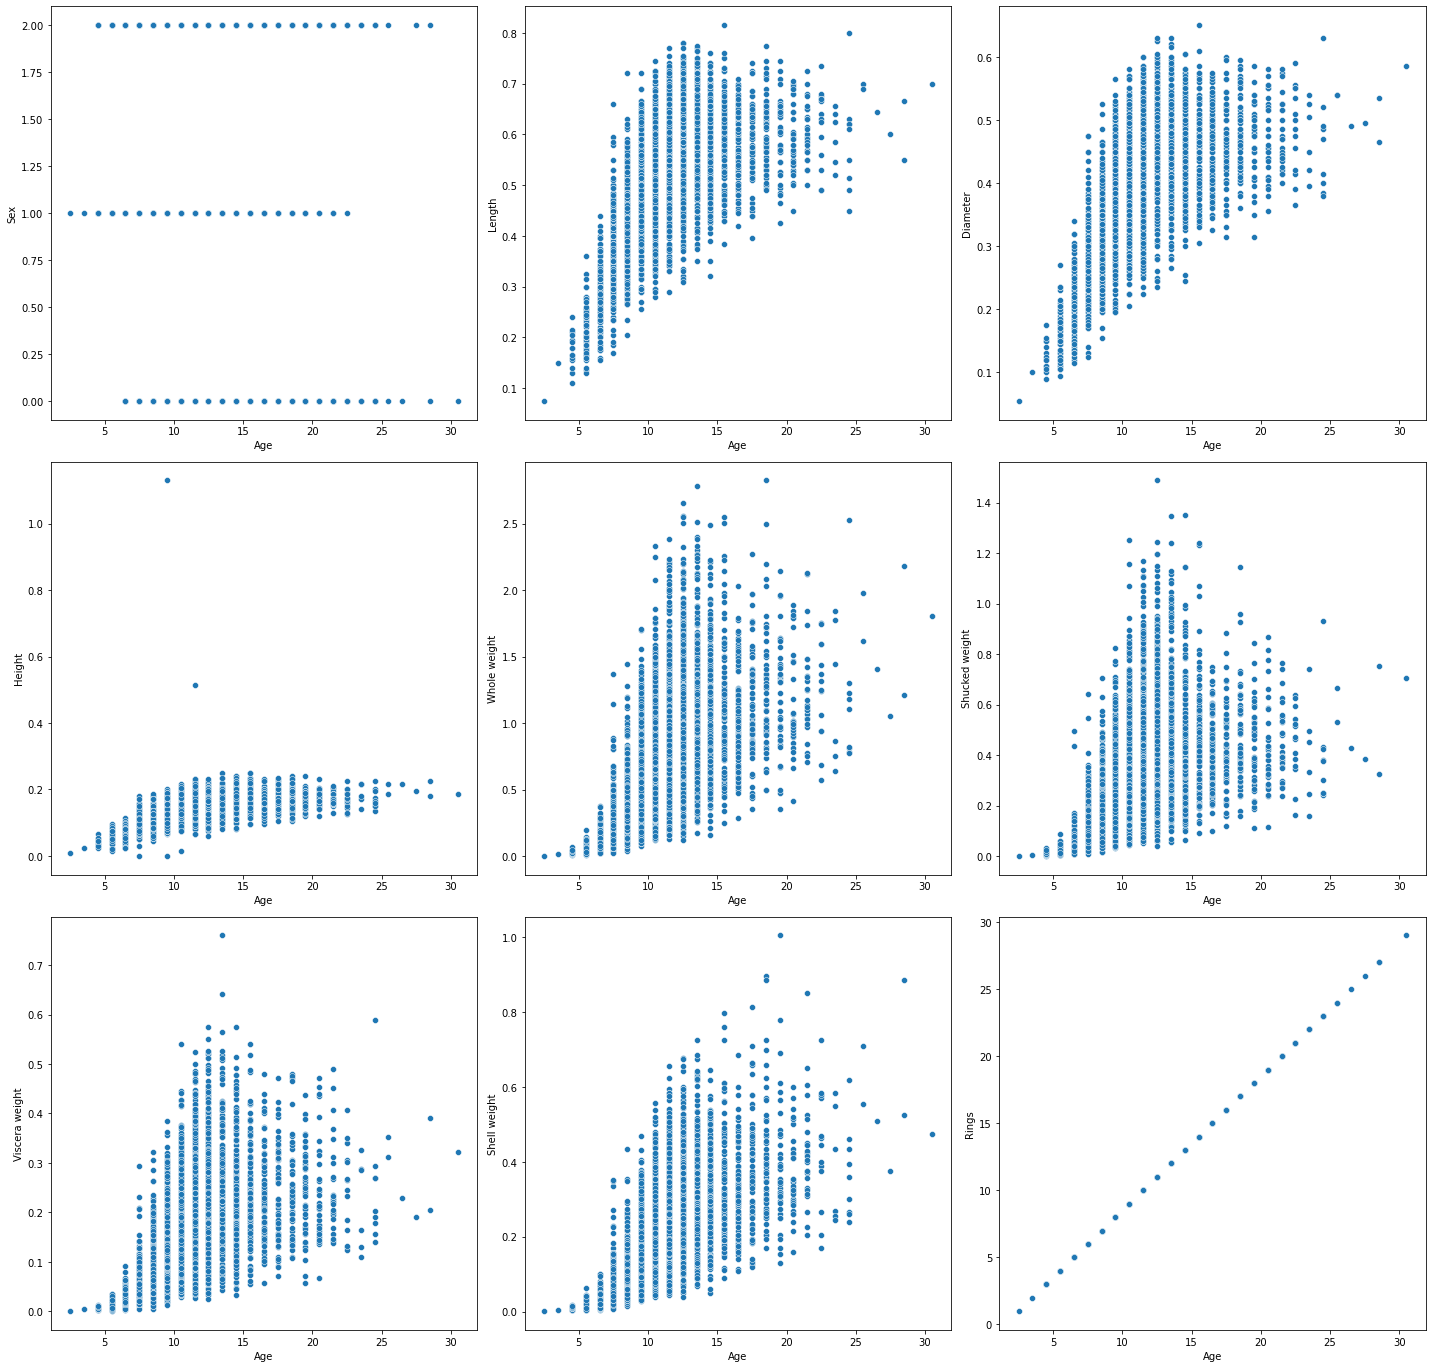

In [14]:

#Checking Realtionship between target and labels through graphs

X = df.drop(columns=['Age'])
y = df['Age']
plt.figure(figsize=(20,25))

plotnumber=1

for column in X:
    if plotnumber<=12 : 
        ax=plt.subplot(4,3,plotnumber)
        sns.scatterplot(y,X[column])
        
    plotnumber+=1
plt.tight_layout()

## conclusion
1)As we can see age of female is more as compared to male and infant
2) As age increses Length ,Diameter, and other feature also increase 
3) Height is limited to only some extent 
4) In Given Dataset most Age occurs between 5 to 25 years
5)age and rings are directly propotional to each other

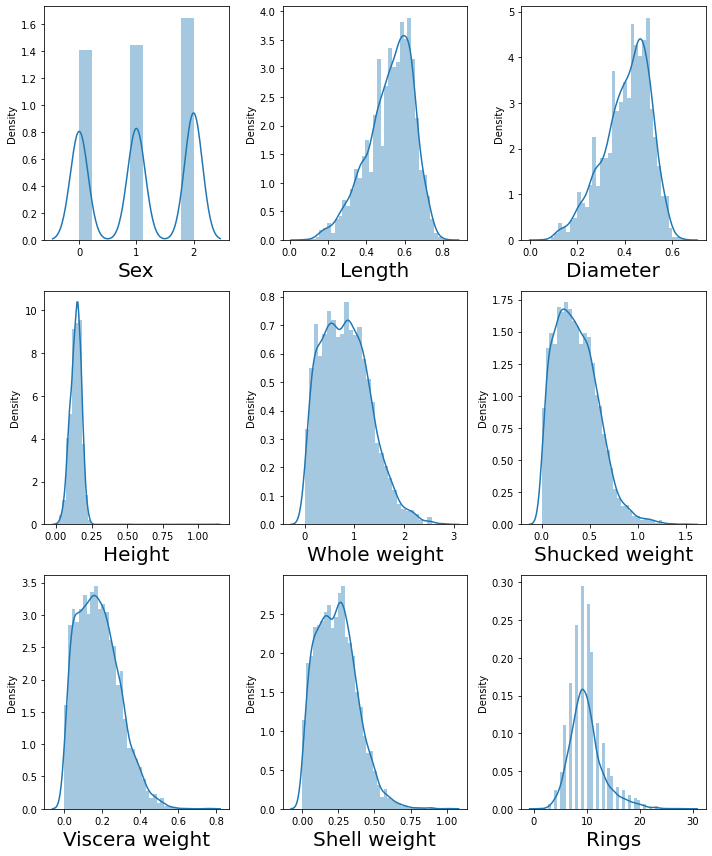

In [15]:
#lets plot to see data distribution


plt.figure(figsize=(10,12),facecolor='white')
plotnumber = 1


for column in df:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

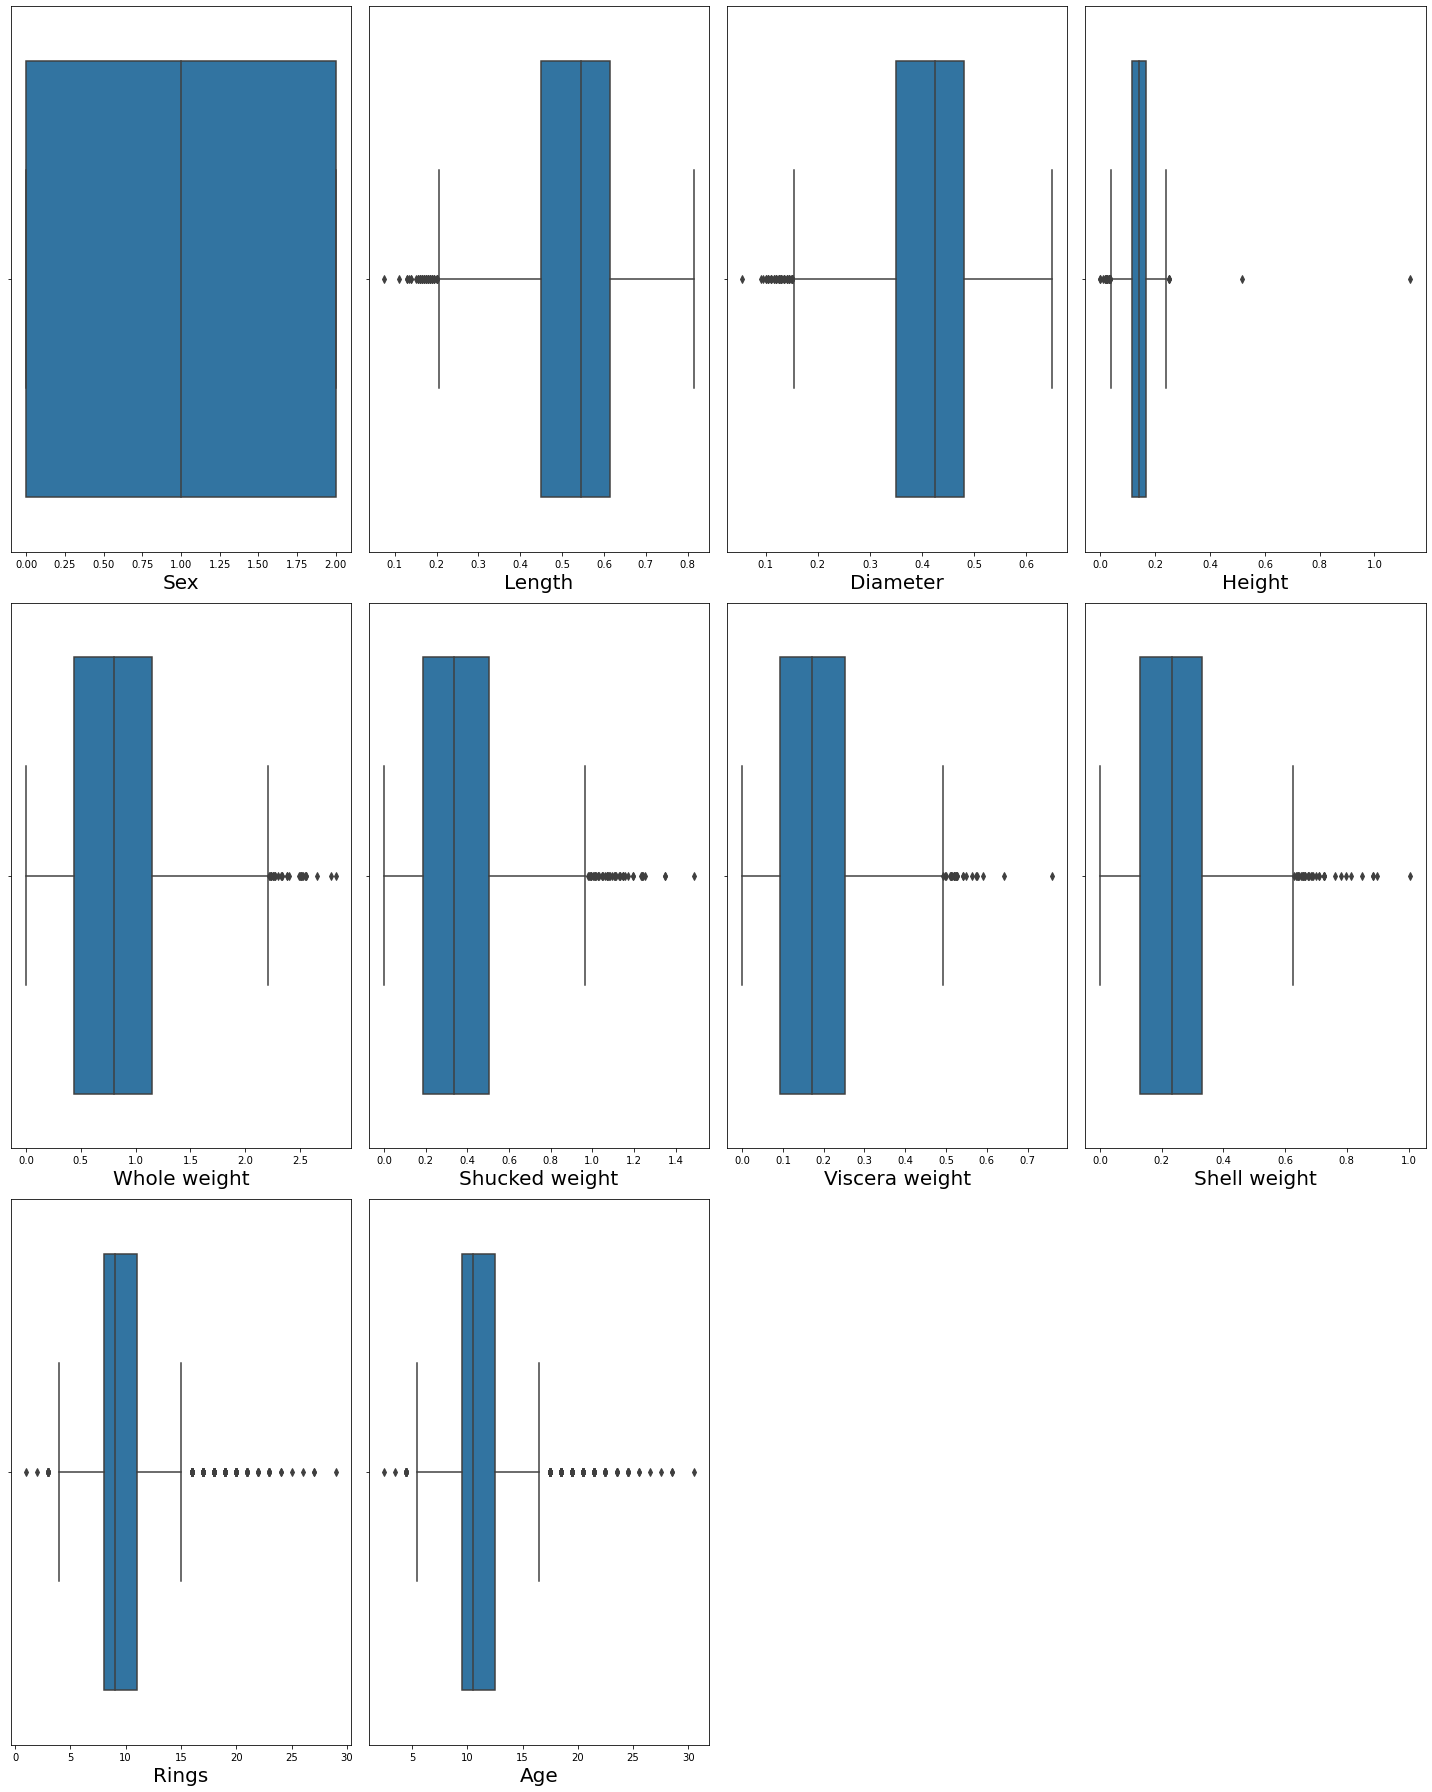

In [16]:
#Checking for Outliers using Box Plot
plt.figure(figsize=(20,25))

plotnumber=1

for column in df:
    if plotnumber<=12 : 
        ax=plt.subplot(3,4,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column , fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

In [17]:
# Here we see skewness is present and we'll treat it using z score

In [18]:
# z_score=(x-mean)/std
from scipy.stats import zscore
z_score=zscore(df[['Sex','Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight','Rings']])
# abs(absolute) = to get scaled data
abs_z_score=np.abs(z_score)
filter_score=(abs_z_score<3).all(axis=1)
df=df[filter_score]


In [19]:
df.describe()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
count,4027.000000,4027.000000,4027.000000,4027.000000,4027.000000,4027.000000,4027.000000,4027.000000,4027.000000,4027.000000
mean,1.051403,0.520987,0.405300,0.138002,0.802805,0.349099,0.175718,0.230676,9.738763,11.238763
std,0.818071,0.115910,0.095903,0.036878,0.456192,0.206406,0.103350,0.127939,2.864691,2.864691
min,0.000000,0.165000,0.115000,0.015000,0.014500,0.005500,0.000500,0.005000,3.000000,4.500000
25%,0.000000,0.450000,0.345000,0.115000,0.438000,0.182000,0.091750,0.127750,8.000000,9.500000
50%,1.000000,0.540000,0.420000,0.140000,0.783000,0.329500,0.167000,0.225000,9.000000,10.500000
75%,2.000000,0.610000,0.480000,0.165000,1.131250,0.493500,0.246500,0.320000,11.000000,12.500000
max,2.000000,0.760000,0.605000,0.250000,2.238500,1.017000,0.492500,0.655000,19.000000,20.500000


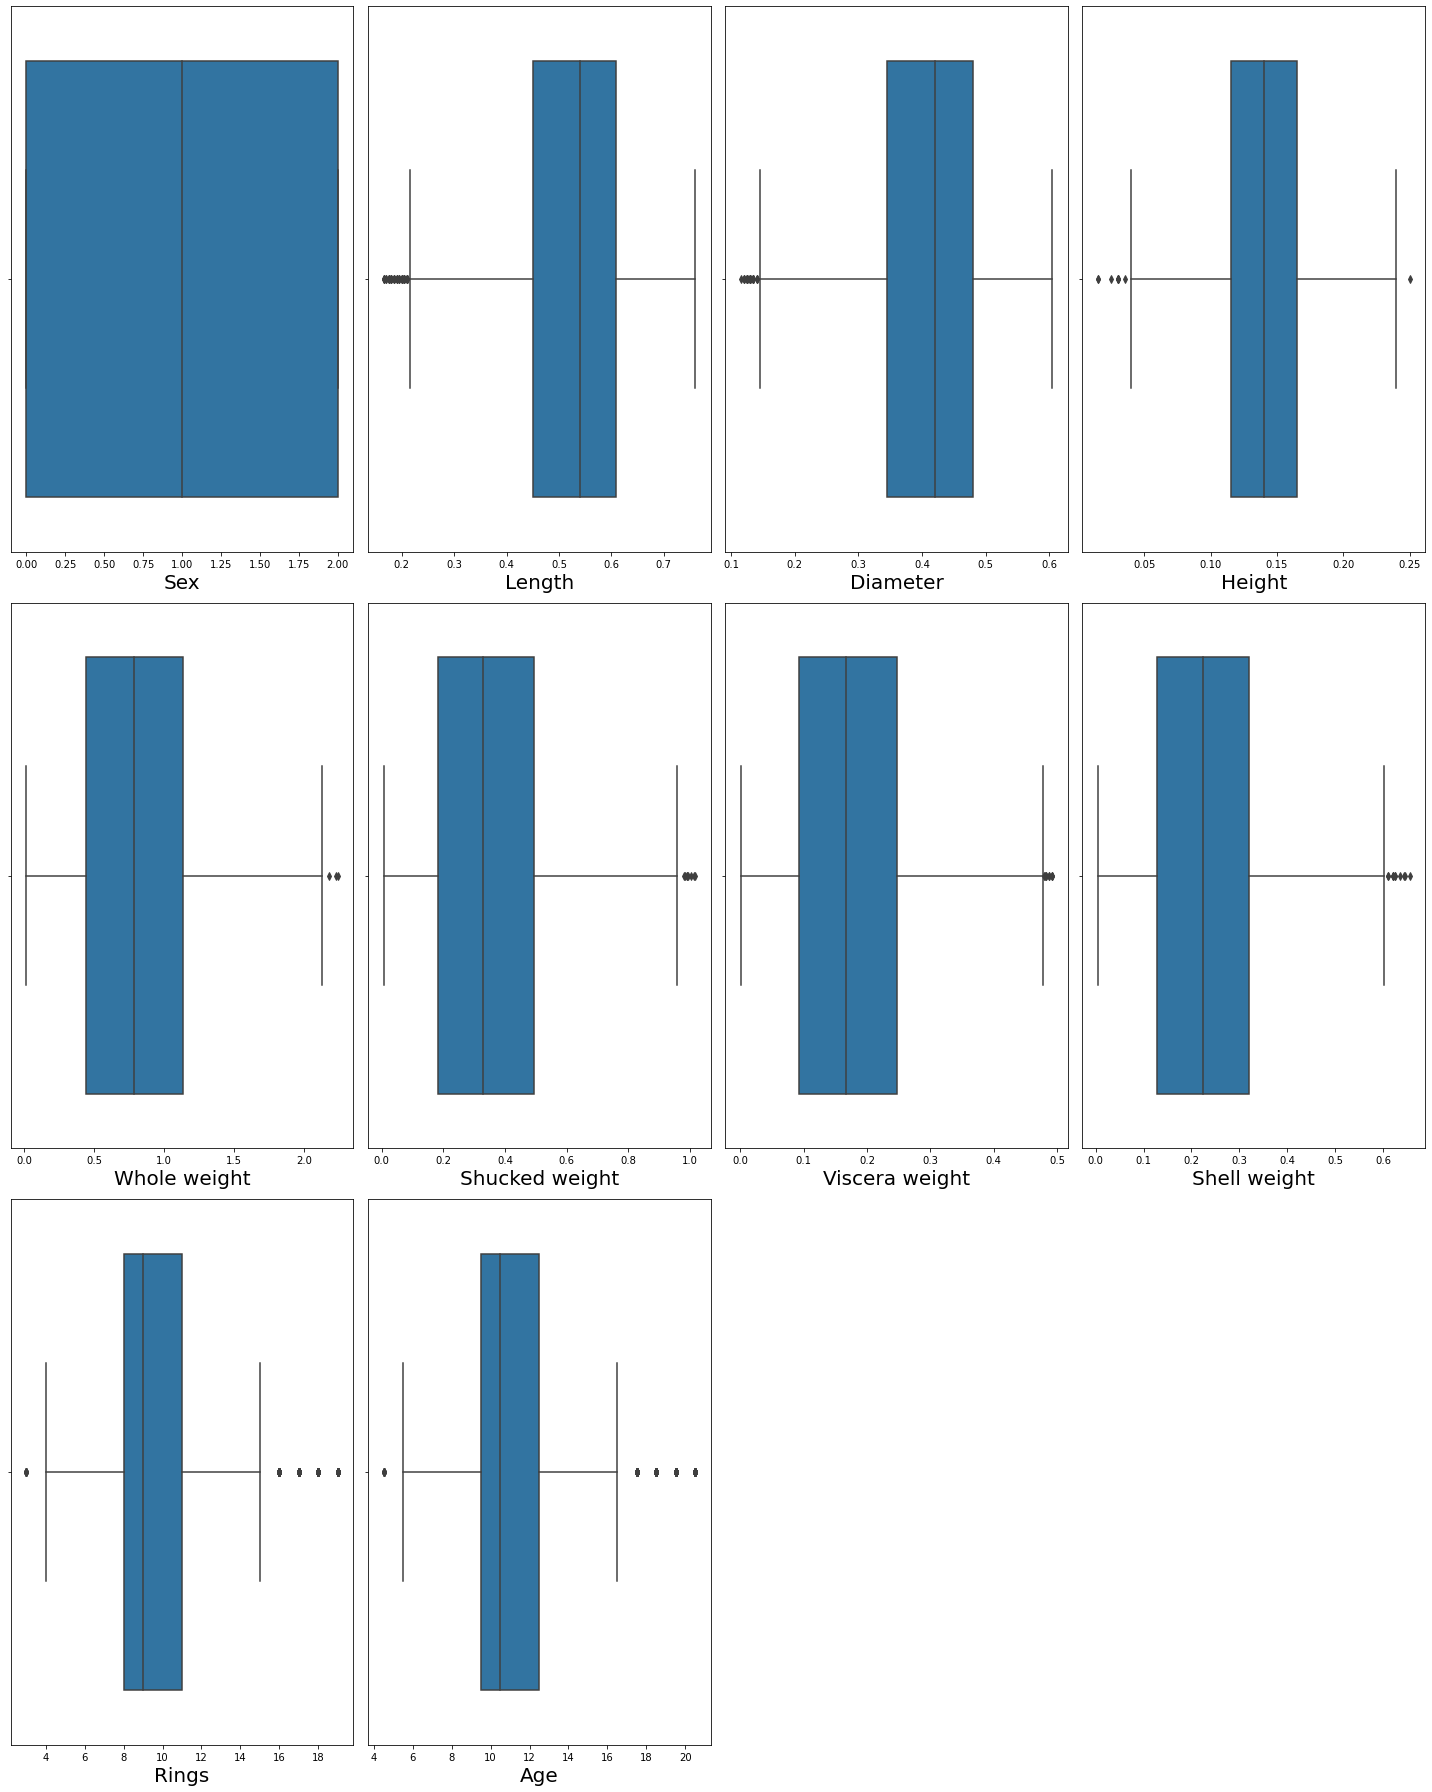

In [20]:
#Checking for Outliers using Box Plot
plt.figure(figsize=(20,25))

plotnumber=1

for column in df:
    if plotnumber<=12 : 
        ax=plt.subplot(3,4,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column , fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

In [21]:
# here we see less amount of outliers

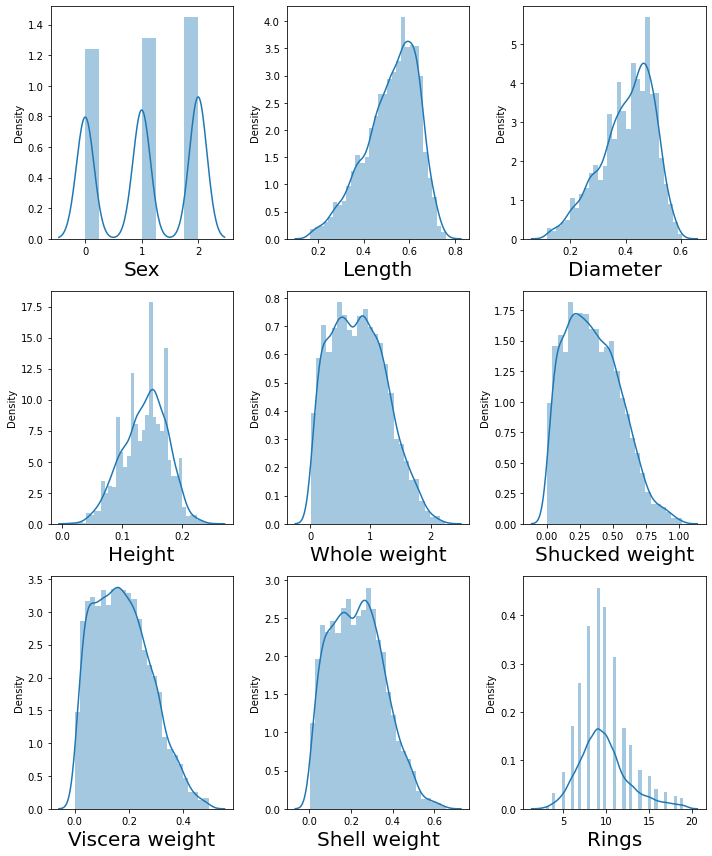

In [22]:
#lets plot to see data distribution


plt.figure(figsize=(10,12),facecolor='white')
plotnumber = 1


for column in df:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

In [23]:
# skewness is also reduced we can continue

In [24]:
# Splitting Data into training and testing


x = df.drop(columns=['Age'])
y = df['Age']

x_train,x_test,y_train,y_test = train_test_split(x , y , test_size = 0.30 , random_state = 360) 

## Model Building

In [25]:
from sklearn.tree import DecisionTreeRegressor
model_DT = DecisionTreeRegressor(max_features=8, max_leaf_nodes=400, random_state = 360)
model_DT.fit(x_train, y_train)

DecisionTreeRegressor(max_features=8, max_leaf_nodes=400, random_state=360)

In [26]:
model_DT.score(x_train,y_train)


1.0

In [27]:
#Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

param_grid = {  'bootstrap': [True], 'max_depth': [5, 10,15,30, None], 'max_features': ['auto', 'log2','sqrt'], 'n_estimators': [100,200]}

In [28]:
rfr = RandomForestRegressor(random_state = 1)



In [29]:
g_search = GridSearchCV(estimator = rfr, param_grid = param_grid, 

                          cv = 3, n_jobs = 1, verbose = 0, return_train_score=True)

In [30]:
g_search.fit(x_train, y_train);

print(g_search.best_params_)

{'bootstrap': True, 'max_depth': 10, 'max_features': 'auto', 'n_estimators': 200}


In [32]:
g_search.score(x_train,y_train)

1.0